In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [111]:
df = pd.read_csv("dataset_recommendation_cours.csv")

In [112]:
df.head()

,LearningStyle,CareerGoal,Preferences,AcademicLevel,Module,Cours_Recommandé
0,Kinesthésique,Cybersecurity Expert,IA,Licence 1,Machine Learning,Deep Learning avec TensorFlow
1,Visuel,Cloud Engineer,IA,Master 1,Machine Learning,Deep Learning avec TensorFlow
2,Lecture/Écriture,DevOps Engineer,Systèmes embarqués,Master 2,Cloud Computing,AWS Solutions Architect
3,Auditif,Cybersecurity Expert,Mathématiques,Licence 1,Sécurité Informatique,Sécurité Offensive et Pentesting
4,Kinesthésique,Cybersecurity Expert,Systèmes embarqués,Master 2,Sécurité Informatique,Sécurité Offensive et Pentesting


In [113]:
df.describe()

,LearningStyle,CareerGoal,Preferences,AcademicLevel,Module,Cours_Recommandé
count,1000,1000,1000,1000,1000,1000
unique,4,5,5,5,5,5
top,Lecture/Écriture,Data Scientist,Mathématiques,Licence 1,Sécurité Informatique,Sécurité Offensive et Pentesting
freq,257,227,211,218,218,218


In [114]:
df.columns

Index(['LearningStyle', 'CareerGoal', 'Preferences', 'AcademicLevel', 'Module',
       'Cours_Recommandé'],
      dtype='object')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LearningStyle     1000 non-null   object
 1   CareerGoal        1000 non-null   object
 2   Preferences       1000 non-null   object
 3   AcademicLevel     1000 non-null   object
 4   Module            1000 non-null   object
 5   Cours_Recommandé  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [207]:
print("Nombre de doublons:", df.duplicated().sum())

Nombre de doublons: 172


In [209]:
df.drop_duplicates(inplace=True)

In [211]:
print("Nombre de doublons:", df.duplicated().sum())

Nombre de doublons: 0


In [119]:
print("Valeurs manquantes:", df.isnull().sum())

Valeurs manquantes: LearningStyle       0
CareerGoal          0
Preferences         0
AcademicLevel       0
Module              0
Cours_Recommandé    0
dtype: int64


In [120]:

df.dropna(inplace=True)

In [121]:
# Encodage des variables catégorielles
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Stocker l'encodeur pour une utilisation future


In [122]:
# Détection et suppression des valeurs aberrantes avec l'IQR
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

df_cleaned = remove_outliers(df)


In [123]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# Vérification si le dataset est vide après nettoyage
if df_cleaned.empty:
    print("Aucune donnée après suppression des valeurs aberrantes.")
else:
    # Normalisation (MinMaxScaler)
    scaler_minmax = MinMaxScaler()
    df_normalized = pd.DataFrame(scaler_minmax.fit_transform(df_cleaned), columns=df_cleaned.columns)

    # Standardisation (StandardScaler)
    scaler_std = StandardScaler()
    df_standardized = pd.DataFrame(scaler_std.fit_transform(df_cleaned), columns=df_cleaned.columns)


In [124]:
 df_normalized.head()

,LearningStyle,CareerGoal,Preferences,AcademicLevel,Module,Cours_Recommandé
0,0.333333,0.25,0.00,0.00,0.75,0.5
1,1.000000,0.00,0.00,0.75,0.75,0.5
2,0.666667,0.75,0.75,1.00,0.00,0.0
3,0.000000,0.25,0.25,0.00,1.00,1.0
4,0.333333,0.25,0.75,1.00,1.00,1.0


In [125]:
df_standardized.head()

,LearningStyle,CareerGoal,Preferences,AcademicLevel,Module,Cours_Recommandé
0,-0.462196,-0.697803,-1.382855,-1.375451,0.664962,-0.048256
1,1.330302,-1.416436,-1.382855,0.716784,0.664962,-0.048256
2,0.434053,0.739463,0.736214,1.414196,-1.444573,-1.450215
3,-1.358445,-0.697803,-0.676498,-1.375451,1.368141,1.353703
4,-0.462196,-0.697803,0.736214,1.414196,1.368141,1.353703


In [126]:
df_standardized.describe

<bound method NDFrame.describe of      LearningStyle  CareerGoal  Preferences  AcademicLevel    Module  \
0        -0.462196   -0.697803    -1.382855      -1.375451  0.664962   
1         1.330302   -1.416436    -1.382855       0.716784  0.664962   
2         0.434053    0.739463     0.736214       1.414196 -1.444573   
3        -1.358445   -0.697803    -0.676498      -1.375451  1.368141   
4        -0.462196   -0.697803     0.736214       1.414196  1.368141   
..             ...         ...          ...            ...       ...   
823      -1.358445    0.739463     1.442571      -1.375451  1.368141   
824      -1.358445    0.020830     1.442571      -1.375451 -1.444573   
825      -0.462196    0.020830    -0.676498       1.414196 -0.038216   
826      -1.358445    0.739463    -1.382855       0.716784  1.368141   
827       1.330302    0.020830     0.029858       0.716784  1.368141   

     Cours_Recommandé  
0           -0.048256  
1           -0.048256  
2           -1.450215  
3    

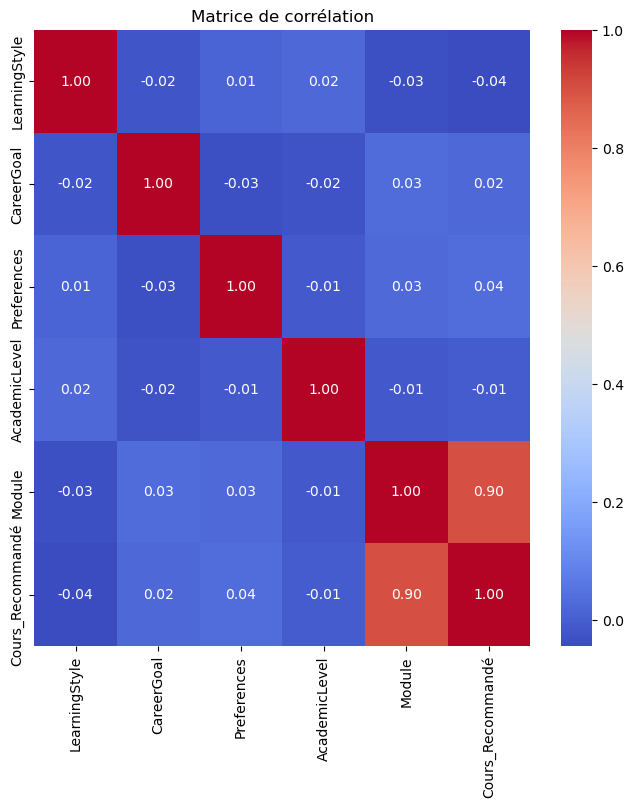

In [215]:
# Matrice de corrélation pour détecter les variables redondantes
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

In [180]:
X = df_cleaned.drop(columns=["Cours_Recommandé"])  # Supposons que c'est la colonne cible
y = df_cleaned["Cours_Recommandé"]

# Division en train et test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [213]:



k_values = range(1, 100)


cv_scores = []


for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy') 
    cv_scores.append(scores.mean()) 


best_k = k_values[np.argmax(cv_scores)]
print(f"Meilleur k sélectionné : {best_k}")


best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)




Meilleur k sélectionné : 8


In [184]:
accuracy_score(y_test, y_pred)

0.8554216867469879

In [186]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.92      0.92        38\n           1       0.75      0.90      0.82        30\n           2       0.79      0.84      0.82        32\n           3       0.87      0.79      0.83        33\n           4       0.96      0.82      0.89        33\n\n    accuracy                           0.86       166\n   macro avg       0.86      0.85      0.85       166\nweighted avg       0.86      0.86      0.86       166\n'

In [132]:


model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [133]:
accuracy_score(y_test, y_pred)

1.0

In [134]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        38\n           1       1.00      1.00      1.00        30\n           2       1.00      1.00      1.00        32\n           3       1.00      1.00      1.00        33\n           4       1.00      1.00      1.00        33\n\n    accuracy                           1.00       166\n   macro avg       1.00      1.00      1.00       166\nweighted avg       1.00      1.00      1.00       166\n'

In [188]:


model = SVC(kernel="linear")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        38\n           1       1.00      1.00      1.00        30\n           2       1.00      1.00      1.00        32\n           3       1.00      1.00      1.00        33\n           4       1.00      1.00      1.00        33\n\n    accuracy                           1.00       166\n   macro avg       1.00      1.00      1.00       166\nweighted avg       1.00      1.00      1.00       166\n'

In [190]:
accuracy_score(y_test, y_pred)

1.0

In [137]:


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)



1.0

In [138]:
!pip install xgboost


In [139]:


# Initialisation du modèle sans use_label_encoder
model = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Entraînement
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)




Accuracy : 1.0
